# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:red">ESCREVER AQUI</span>






#### Objetivo:

Criar um modelo que prevê a renda dos clientes com base no tempo de emprego.

## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:red">ESCREVER AQUI</span>


### Dicionário de dados

<span style="color:red">ESCREVER AQUI</span>


| Variável                | Descrição                                           | Tipo   |
| ----------------------- |:---------------------------------------------------:| ------:|
| data_ref                |  Data de referência                                 | object |
| id_cliente              |  ID do clinete                                      | int64  |
| sexo                    |  Sexo do cliente                                    | object |
| posse_de_veiculo        |  Se o cliente possui veículo                        | bool   |
| posse_de_imovel         |  Se o cliente possui imóvel                         | bool   |
| qtd_filhos              |  Quantidade filhos                                  | int64  |
| tipo_renda              |  Tipo de renda                                      | object |
| educacao                |  Nível de educação formal                           | object |
| estado_civil            |  Estado civíl                                       | object |
| tipo_residencia         |  Tipo de residência                                 | object |
| idade                   |  Idade do cliente                                   | int64  |
| tempo_emprego           |  Tempo de emprego                                   | float64|
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência      | float64|
| renda                   |  Valor da renda                                     | float64|




#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

<span style="color:red">ESCREVER AQUI</span>


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text

from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

<span style="color:red">ESCREVER AQUI</span>


In [2]:
df = pd.read_csv('./input/previsao_de_renda.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [4]:
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [5]:
print('Menor renda:',df['renda'].min())
print('Maior renda:',df['renda'].max())

Menor renda: 118.71
Maior renda: 245141.67


In [6]:
print('Pessoas com renda maior que 10.000:',df[df['renda'] > 10000].shape[0])

print('Pessoas com renda menor que 10.000:',df[df['renda'] < 10000].shape[0])

Pessoas com renda maior que 10.000: 1891
Pessoas com renda menor que 10.000: 13109


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [7]:
prof = ProfileReport(df, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# prof.to_file('./output/renda_analisys.html')

<span style="color:red">ESCREVER AQUI</span>


### Entendimento dos dados - Bivariadas




<span style="color:red">ESCREVER AQUI</span>


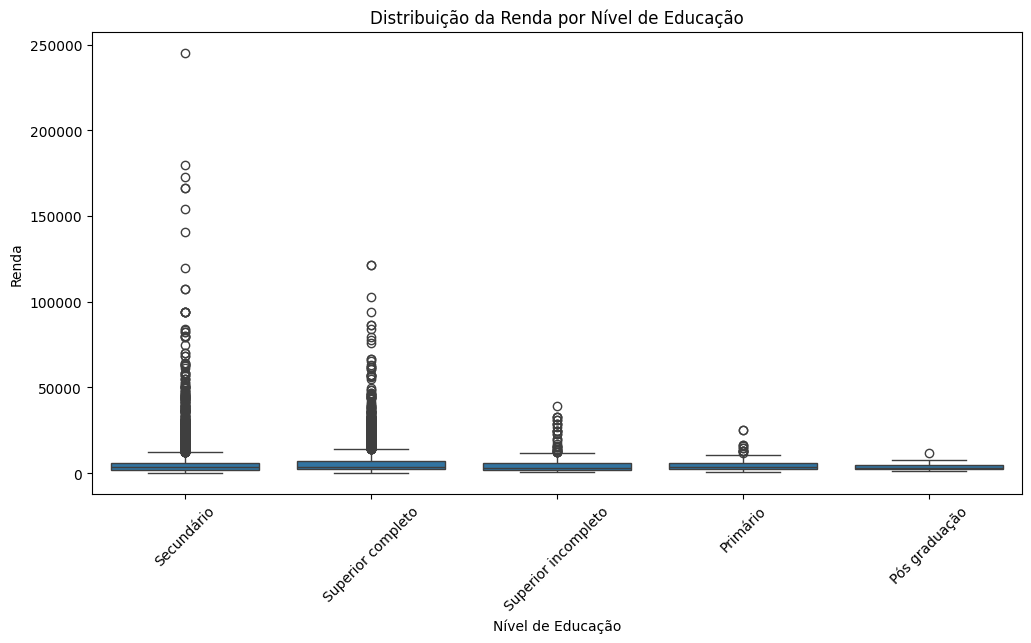

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='educacao', y='renda', data=df)
plt.title('Distribuição da Renda por Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Renda')
plt.xticks(rotation=45)
plt.show()

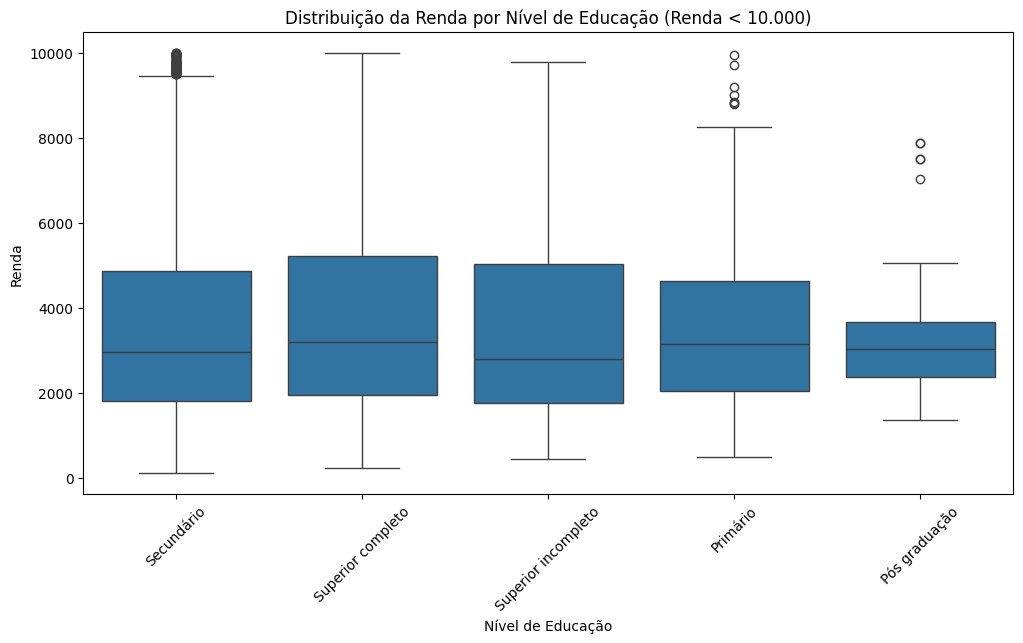

In [10]:
# Filtrando o dataframe para rendas abaixo de 10.000
df_renda_abaixo_10000 = df[df['renda'] < 10000]

plt.figure(figsize=(12, 6))
sns.boxplot(x='educacao', y='renda', data=df_renda_abaixo_10000)
plt.title('Distribuição da Renda por Nível de Educação (Renda < 10.000)')
plt.xlabel('Nível de Educação')
plt.ylabel('Renda')
plt.xticks(rotation=45)
plt.yticks(range(0, 10001, 2000))
plt.show()


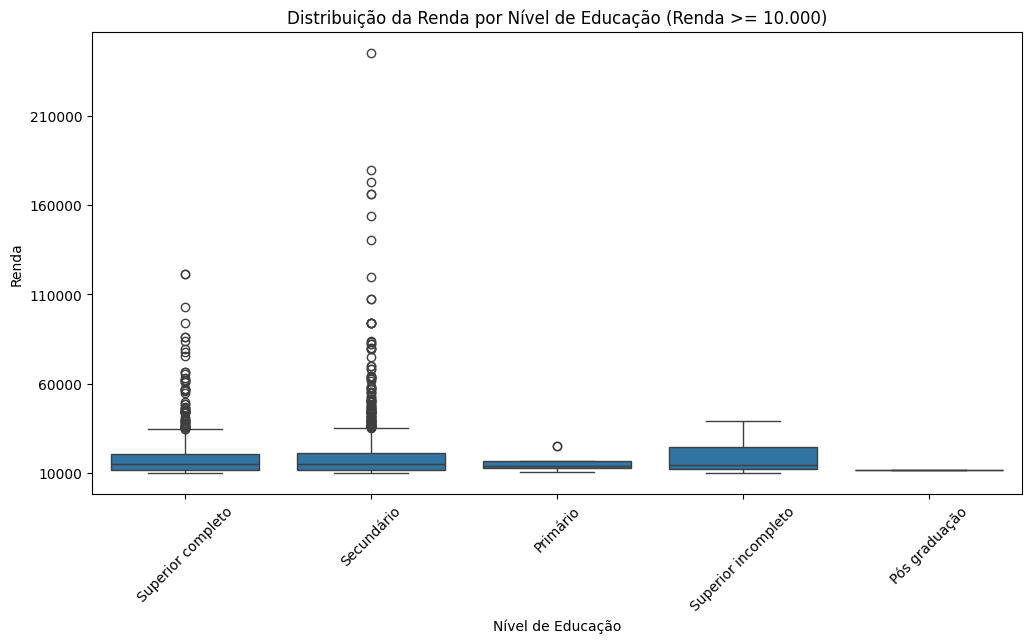

In [11]:
# Filtrando o dataframe para rendas acima de 10.000
df_renda_acima_10000 = df[df['renda'] >= 10000]

plt.figure(figsize=(12, 6))
sns.boxplot(x='educacao', y='renda', data=df_renda_acima_10000)
plt.title('Distribuição da Renda por Nível de Educação (Renda >= 10.000)')
plt.xlabel('Nível de Educação')
plt.ylabel('Renda')
plt.xticks(rotation=45)
plt.yticks(range(10000, 250001, 50000))
plt.show()


In [12]:
# Codificação da variável 'educacao' (se necessário)
df['educacao'] = df['educacao'].astype('category').cat.codes

# Cálculo da correlação entre 'educacao' e 'renda'
correlation = df['educacao'].corr(df['renda'])
print(f'Correlação entre Educação e Renda: {correlation}')

Correlação entre Educação e Renda: 0.01966515560690667


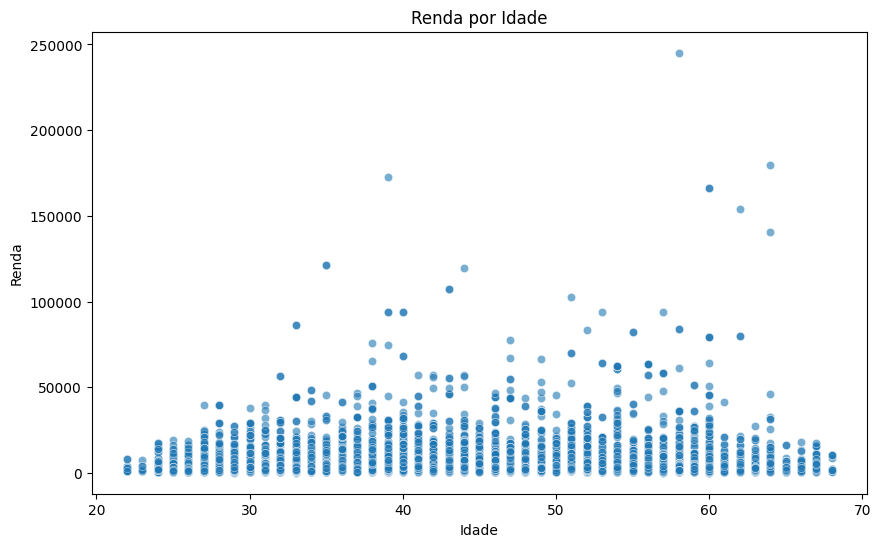

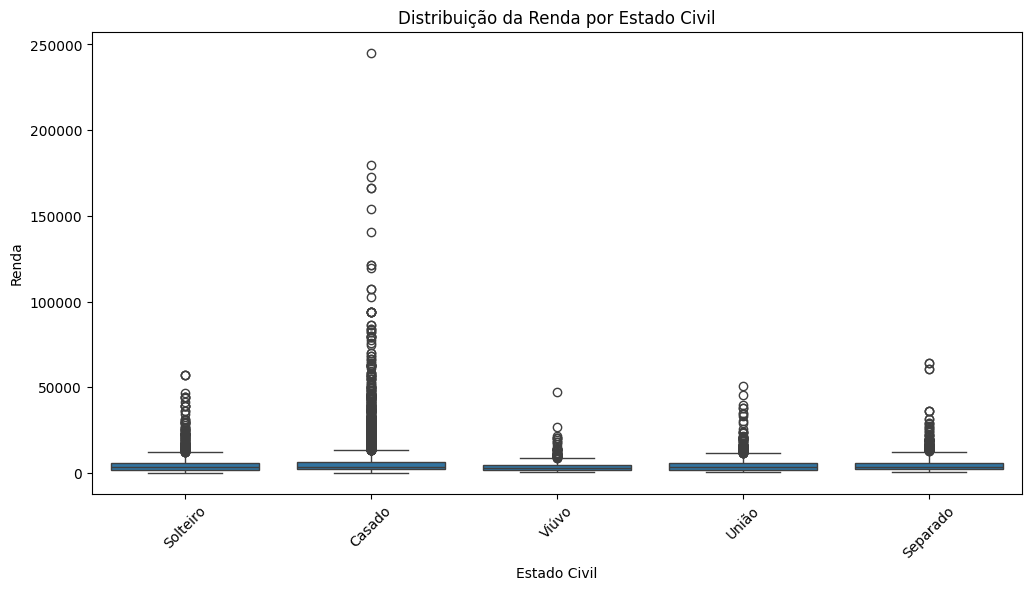

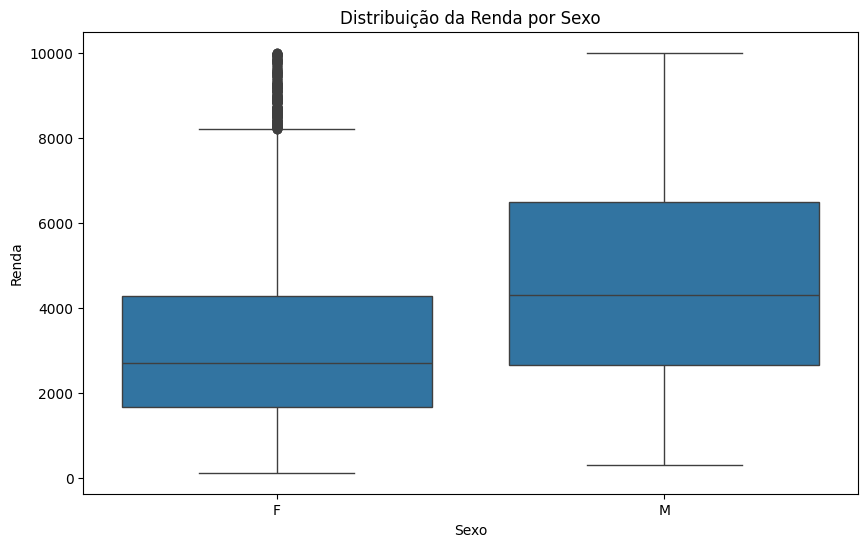

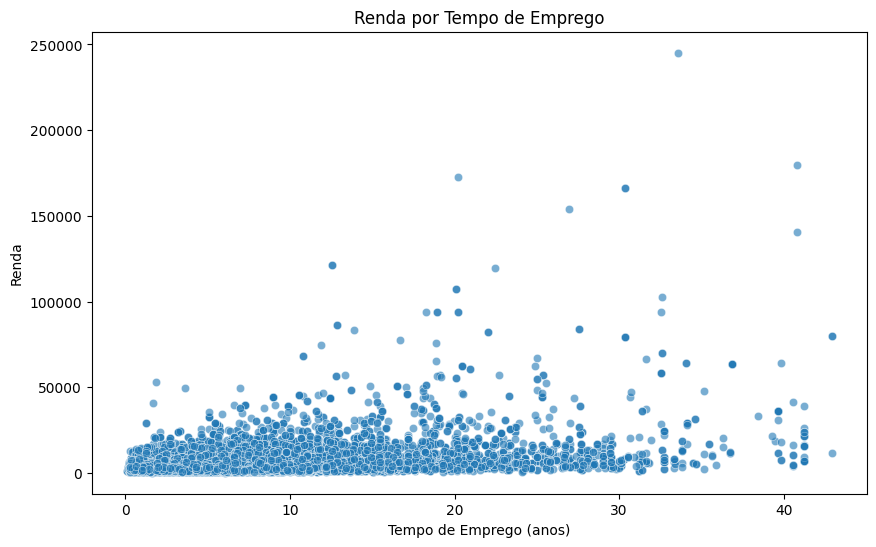

In [13]:
# Gráfico de dispersão para 'idade' e 'renda'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idade', y='renda', data=df, alpha=0.6)
plt.title('Renda por Idade')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.show()

# Gráfico de boxplot para 'estado_civil' e 'renda'
plt.figure(figsize=(12, 6))
sns.boxplot(x='estado_civil', y='renda', data=df)
plt.title('Distribuição da Renda por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Renda')
plt.xticks(rotation=45)
plt.show()

# Gráfico de boxplot para 'sexo' e 'renda'
sex_renda_abaxo_10000 = df[df['renda'] <= 10000]
plt.figure(figsize=(10, 6))
sns.boxplot(x='sexo', y='renda', data = sex_renda_abaxo_10000)
plt.title('Distribuição da Renda por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Renda')
plt.show()

# Gráfico de dispersão para 'tempo_emprego' e 'renda'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo_emprego', y='renda', data=df, alpha=0.6)
plt.title('Renda por Tempo de Emprego')
plt.xlabel('Tempo de Emprego (anos)')
plt.ylabel('Renda')
plt.show()


In [14]:
# Selecionar variáveis numéricas
numeric_vars = ['idade', 'tempo_emprego', 'qt_pessoas_residencia','qtd_filhos']

# Calcular correlação entre 'renda' e outras variáveis numéricas
for var in numeric_vars:
    correlation = df[var].corr(df['renda'])
    print(f'Correlação entre {var} e Renda: {correlation}')


Correlação entre idade e Renda: 0.022435310735452848
Correlação entre tempo_emprego e Renda: 0.3850126504347835
Correlação entre qt_pessoas_residencia e Renda: 0.04784211656716783
Correlação entre qtd_filhos e Renda: 0.029345895605227306


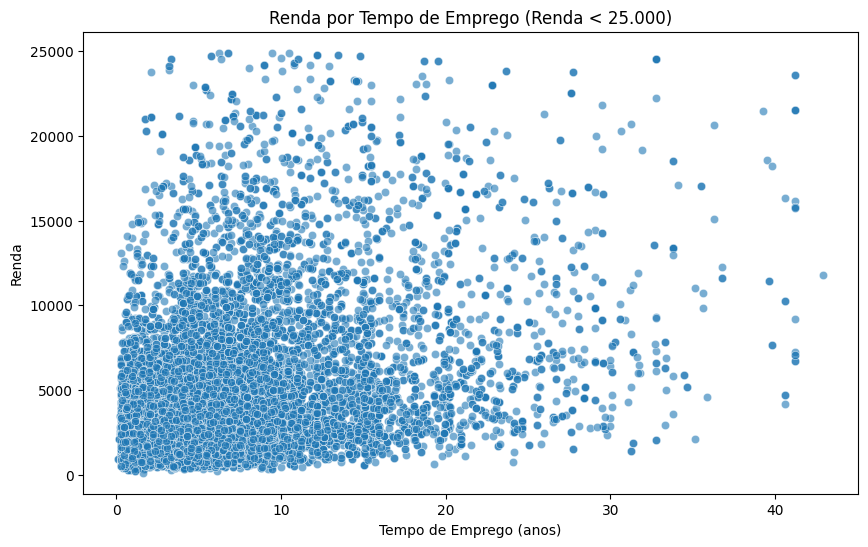

In [15]:
df_renda_abaixo_10000 = df[df['renda'] < 25000]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo_emprego', y='renda', data=df_renda_abaixo_10000, alpha=0.6)
plt.title('Renda por Tempo de Emprego (Renda < 25.000)')
plt.xlabel('Tempo de Emprego (anos)')
plt.ylabel('Renda')
plt.show()

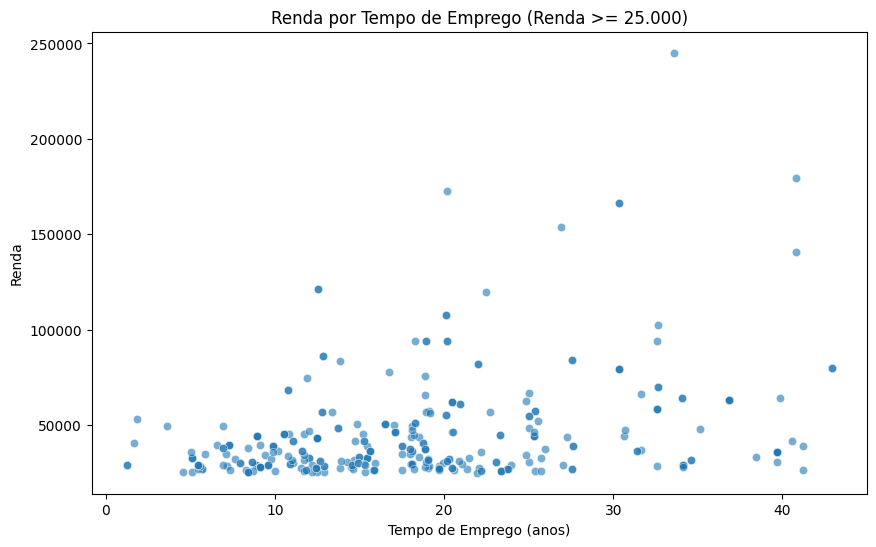

In [16]:
# Filtrando o dataframe para rendas acima de 10.000
df_renda_acima_10000 = df[df['renda'] >= 25000]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo_emprego', y='renda', data=df_renda_acima_10000, alpha=0.6)
plt.title('Renda por Tempo de Emprego (Renda >= 25.000)')
plt.xlabel('Tempo de Emprego (anos)')
plt.ylabel('Renda')
plt.show()


## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [17]:
df = df.drop(['Unnamed: 0', 'id_cliente'], axis=1)
df['tempo_emprego'] = df['tempo_emprego'].fillna(0)
df = df.drop_duplicates()
df.isna().sum()

data_ref                 0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

<span style="color:red">ESCREVER AQUI</span>


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:red">ESCREVER AQUI</span>


### Rodando o modelo


<span style="color:red">ESCREVER AQUI</span>


In [18]:
# Selecionando as variáveis de interesse
X = df[['tempo_emprego']]  # Variável independente
y = df['renda']            # Variável dependente

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Criando o objeto do modelo de regressão linear
modelo = LinearRegression()

# Treinando o modelo com os dados de treino
modelo.fit(X_train, y_train)


LinearRegression()

In [20]:
# Fazendo previsões com o conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')


MSE: 55621874.0461935
R²: 0.12534262909060034


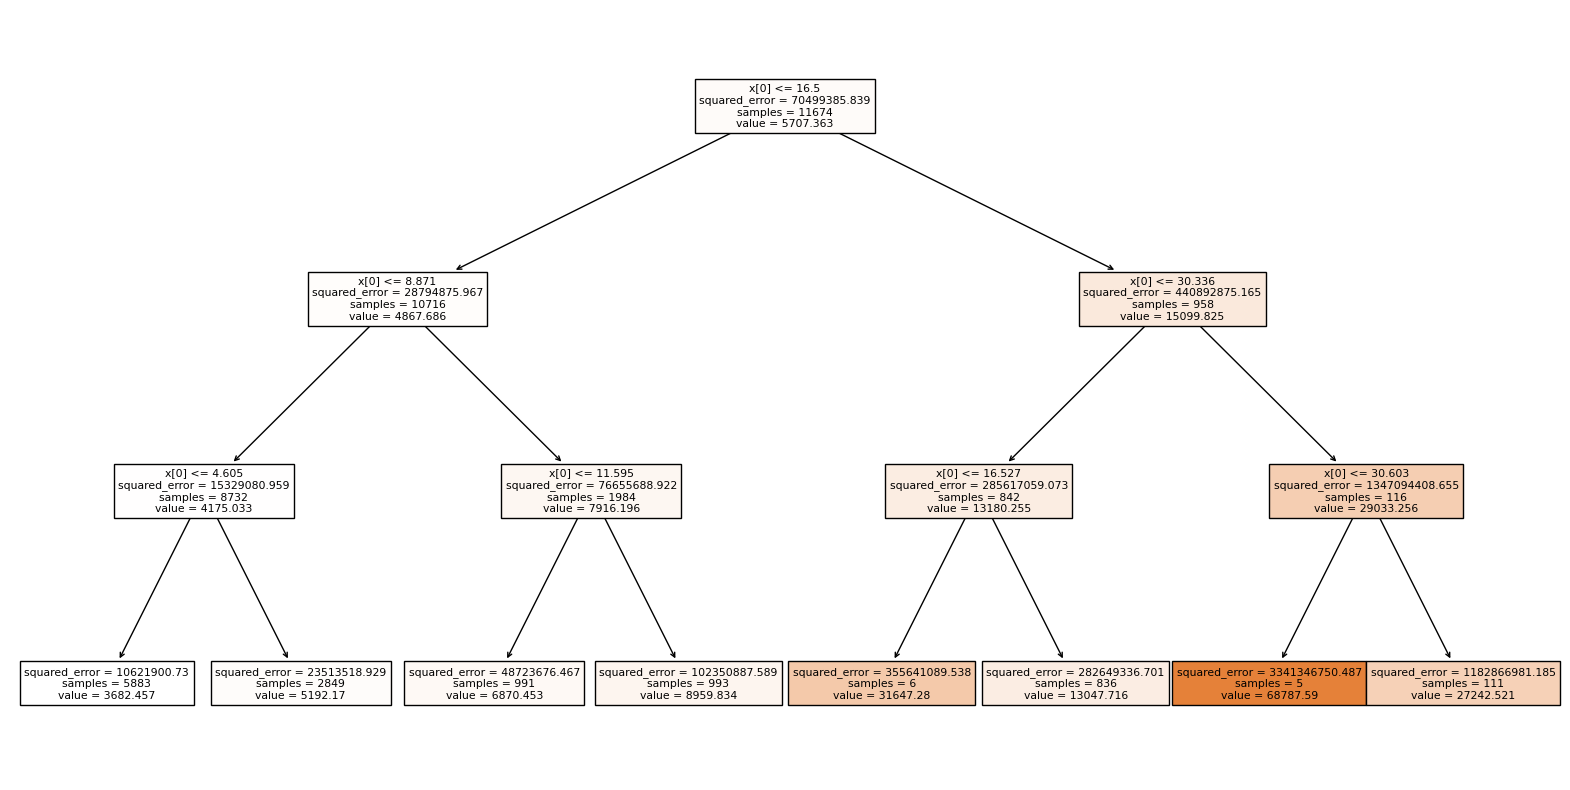

In [23]:
modelo = DecisionTreeRegressor(max_depth=3, min_samples_split=10, min_samples_leaf=5)
modelo.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(modelo, filled=True)
plt.savefig('arvore_decisao.png')
plt.show()


In [26]:
tree_rules = export_text(modelo)
print(tree_rules)

|--- feature_0 <= 16.50
|   |--- feature_0 <= 8.87
|   |   |--- feature_0 <= 4.61
|   |   |   |--- value: [3682.46]
|   |   |--- feature_0 >  4.61
|   |   |   |--- value: [5192.17]
|   |--- feature_0 >  8.87
|   |   |--- feature_0 <= 11.59
|   |   |   |--- value: [6870.45]
|   |   |--- feature_0 >  11.59
|   |   |   |--- value: [8959.83]
|--- feature_0 >  16.50
|   |--- feature_0 <= 30.34
|   |   |--- feature_0 <= 16.53
|   |   |   |--- value: [31647.28]
|   |   |--- feature_0 >  16.53
|   |   |   |--- value: [13047.72]
|   |--- feature_0 >  30.34
|   |   |--- feature_0 <= 30.60
|   |   |   |--- value: [68787.59]
|   |   |--- feature_0 >  30.60
|   |   |   |--- value: [27242.52]



## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>


**Regressão Linear**


Os resultados indicam que o modelo tem um MSE (Mean Squared Error) de aproximadamente 55,621,874 e um R² (coeficiente de determinação) de aproximadamente 0.125.

O MSE alto sugere que o modelo tem um erro médio relativamente grande nas previsões. O R² baixo indica que o modelo atualmente só consegue explicar cerca de 12.5% da variância na variável ‘renda’. Isso pode ser devido à complexidade dos dados ou à necessidade de incluir mais variáveis preditoras para capturar melhor a relação com a renda.

**Aqui estão as previsões com base nas condições da árvore acima:**


- Se ‘feature_0’ <= 4.61, a previsão é 3682.46.
- Se ‘feature_0’ está entre 4.61 e 8.87, a previsão é 5192.17.
- Se ‘feature_0’ está entre 8.87 e 11.59, a previsão é 6870.45.
- Se ‘feature_0’ está entre 11.59 e 16.50, a previsão é 8959.83.
- Se ‘feature_0’ está entre 16.50 e 16.53, a previsão é 31647.28.
- Se ‘feature_0’ está entre 16.53 e 30.34, a previsão é 13047.72.
- Se ‘feature_0’ está entre 30.34 e 30.60, a previsão é 68787.59.
- Se ‘feature_0’ > 30.60, a previsão é 27242.52.

*Anos trabalhados*

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

-> Vai ser no Streamlit